In [136]:
import pandas as pd
import geopandas
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Data/train.csv')

## Cantidad de tipos de propiedades

In [126]:
df["tipodepropiedad"].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Garage                                1
Hospedaje                             1
Name: tipodepropiedad, dtype: int64

In [127]:
propiedades_habitables = ["Casa", "Apartamento", "Casa en condominio", "Terreno", "Edificio", "Casa uso de suelo", "Departamento Compartido", "Inmuebles productivos urbanos", "Quinta Vacacional", "Duplex", "Villa"]
propiedades_comerciales = ["Local Comercial", "Oficina comercial", "Bodega comercial", "Terreno comercial", "Local en centro comercial"]

propiedades_habitables_df = df[df["tipodepropiedad"].isin(propiedades_habitables)]
propiedades_comerciales_df = df[df["tipodepropiedad"].isin(propiedades_comerciales)]

propiedades_habitables_conteo = propiedades_habitables_df["tipodepropiedad"].value_counts()
propiedades_comerciales_conteo = propiedades_comerciales_df["tipodepropiedad"].value_counts()

Text(0, 0.5, 'Tipo')

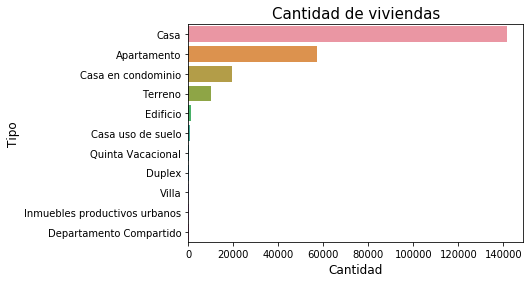

In [128]:
propiedades_habitables_g = sns.barplot(x = propiedades_habitables_conteo.values, y = propiedades_habitables_conteo.index, orient='h')

propiedades_habitables_g.set_title("Cantidad de viviendas", fontsize=15)
propiedades_habitables_g.set_xlabel("Cantidad", fontsize=12)
propiedades_habitables_g.set_ylabel("Tipo", fontsize=12)

Text(0, 0.5, 'Tipo')

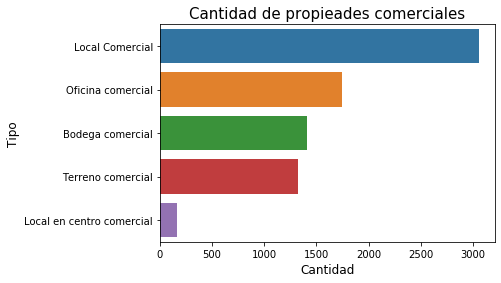

In [129]:
propiedades_comerciales_g = sns.barplot(x = propiedades_comerciales_conteo.values, y = propiedades_comerciales_conteo.index, orient='h')

propiedades_comerciales_g.set_title("Cantidad de propieades comerciales", fontsize=15)
propiedades_comerciales_g.set_xlabel("Cantidad", fontsize=12)
propiedades_comerciales_g.set_ylabel("Tipo", fontsize=12)

## Cantidad de tipos de propiedades por provincia

In [130]:
#Elimino/remplazo NaN molestos
df = df.dropna(subset=["provincia"])
df = df.dropna(subset=["metrostotales"])
df = df.dropna(subset=["habitaciones"])
df = df.dropna(subset=["banos"])
df = df.fillna(0)
df = df[df["provincia"] != 0]
df = df[df["tipodepropiedad"] != 0]

In [131]:
provincia_tipodepropiedad = df.groupby("provincia")["tipodepropiedad"].value_counts().unstack().fillna(0)
provincia_tipodepropiedad

tipodepropiedad,Apartamento,Bodega comercial,Casa,Casa en condominio,Casa uso de suelo,Departamento Compartido,Duplex,Edificio,Inmuebles productivos urbanos,Local Comercial,Local en centro comercial,Nave industrial,Oficina comercial,Otros,Quinta Vacacional,Rancho,Terreno,Terreno comercial,Terreno industrial,Villa
provincia,,,,,,,,,,,,,,,,,,,,
Aguascalientes,24.0,1.0,1211.0,171.0,4.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Baja California Norte,98.0,0.0,2623.0,142.0,0.0,4.0,22.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,2.0,2.0,3.0,1.0,0.0,2.0
Baja California Sur,33.0,0.0,1325.0,28.0,1.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Campeche,4.0,0.0,156.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Chiapas,16.0,1.0,760.0,12.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Chihuahua,26.0,1.0,3312.0,10.0,2.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
Coahuila,7.0,2.0,2899.0,20.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
Colima,32.0,0.0,658.0,42.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Distrito Federal,16873.0,26.0,12147.0,3773.0,158.0,38.0,37.0,49.0,6.0,38.0,0.0,2.0,76.0,20.0,2.0,0.0,90.0,9.0,0.0,0.0


## Tipo de propiedad que más abunda en cada provincia

In [132]:
propiedad_abundante = provincia_tipodepropiedad.idxmax(axis=1)
propiedad_abundante = propiedad_abundante.to_frame()
propiedad_abundante = propiedad_abundante.rename(columns = {0: "tipodepropiedad"})
propiedad_abundante

,tipodepropiedad
provincia,
Aguascalientes,Casa
Baja California Norte,Casa
Baja California Sur,Casa
Campeche,Casa
Chiapas,Casa
Chihuahua,Casa
Coahuila,Casa
Colima,Casa
Distrito Federal,Apartamento


In [133]:
propiedad_abundante["tipodepropiedad"].unique()

array(['Casa', 'Apartamento'], dtype=object)

In [134]:
#Creo mi mapa de mexico
mexico = geopandas.read_file('Data/mexstates.shp') #Los estados pueden ser vistos con mexico.ADMIN_NAME

#Le pongo los tildes al archivo de estados para que me coincidan con las provincias
mexico["ADMIN_NAME"].replace({'Nuevo Leon': "Nuevo León",
                               "San Luis Potosi": "San luis Potosí",
                               "Queretaro": "Querétaro",
                               "Yucatan": "Yucatán",
                               "Michoacan": "Michoacán",
                               "Mexico": "Edo. de México",
                               "Baja California": "Baja California Norte"}, inplace=True)

#Hago un nuevo dataframe con la información del mapa y la antiguedad para cada provincia
gdf = mexico.set_index("ADMIN_NAME").join(propiedad_abundante)

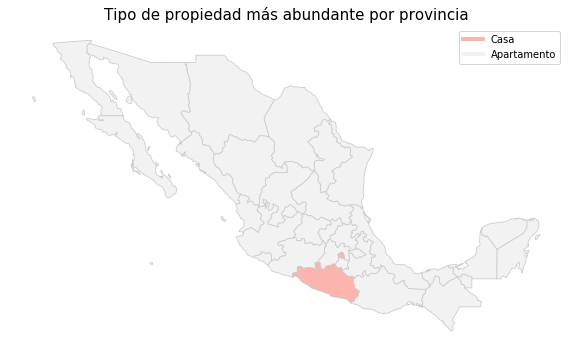

In [157]:
#Grafico el mapa

#Base donde se va a dibujar
fig, base = plt.subplots(1, figsize=(10, 6))

#Saco los ejes de lat y lng ya que no aportan al gráfico
base.axis("off")

#Pido que me coloreé en base al tipo de propiedad
gdf.plot(column="tipodepropiedad", cmap="Pastel1", linewidth=0.8, ax=base, edgecolor="0.8")

#Setteo el título al gráfico
base.set_title("Tipo de propiedad más abundante por provincia", fontsize = 15)

#Preparo todo para graficar la leyenda
tipodepropiedad = propiedad_abundante["tipodepropiedad"].unique()
#Color a usar
cmap = plt.cm.Pastel1
lineas = [Line2D([0], [0], color=cmap(.0), lw=4), Line2D([0], [0], color=cmap(1.), lw=4)]
base.legend(lineas, tipodepropiedad)